# Estimation CCC 
As practice for the RSDC model.
To do so, i use Scipy-Minimize

1. Download Data, & Take Log-Differemce
2. Estimate the Absolute GARCH(1,1) Parameters
3. Estimate the Constant Conditional Correlation Parameters
4. Markov Simulation of precision

### Prepare Data

In [17]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns


labels = [
'MajInv Dk Obl',
'MajInv Gl Obl',
'SparInv Stab Obl',
'BankInv Korte Obl',
'DI Dk Ind',
'Xact OMX C25',
'MSCI World',
'MSCI ACWI',
'MSCI Min. Vol',
'MSCI Small Cap',
'MSCI EM'
]


data_df = pd.read_csv('pm.csv') * 100
# Get Numpy Array of the Data
data = data_df.to_numpy()

# Print Results
data_df.head(), data.shape


(   MajInv Dk Obl  MajInv Gl Obl  SparInv Stab Obl  BankInv Korte Obl  \
 0      -0.197239       0.096759          0.000000           0.000000   
 1       0.197239       0.000000         -0.355240           0.000000   
 2      -0.197239       0.048344         -0.035594           0.000000   
 3       0.000000      -0.096712          0.355366           0.154236   
 4       0.197239       0.145033          0.000000          -0.110144   
 
    DI Dk Ind  Xact OMX C25  MSCI World  MSCI ACWI  MSCI Min. Vol  \
 0  -0.577742     -0.443033   -0.055966  -0.117966       0.160227   
 1   0.509945      0.423811    0.463366   0.600178       0.479146   
 2   0.439859      0.441163    0.477662   0.409813       0.036762   
 3   0.370683      0.477328   -0.300331  -0.292552      -0.454351   
 4  -0.168322     -0.133422   -0.303303  -0.387484      -0.209450   
 
    MSCI Small Cap   MSCI EM  
 0       -0.135196 -0.740727  
 1        0.236473  1.469052  
 2        0.448884  1.129643  
 3       -0.448884 -

In [18]:
data

array([[-0.19723872,  0.09675859,  0.        , ...,  0.16022682,
        -0.13519605, -0.74072676],
       [ 0.19723872,  0.        , -0.35524016, ...,  0.47914583,
         0.23647328,  1.46905193],
       [-0.19723872,  0.04834421, -0.03559352, ...,  0.03676245,
         0.44888416,  1.12964292],
       ...,
       [-0.31655614, -0.06003002,  0.        , ...,  0.26513493,
         0.43343721,  0.79423619],
       [ 0.04226543, -0.16025644, -0.15031946, ..., -0.03531073,
        -0.49551046, -0.18921871],
       [ 0.        ,  0.        ,  0.        , ..., -0.0706589 ,
        -0.43559496, -0.11329112]])

/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

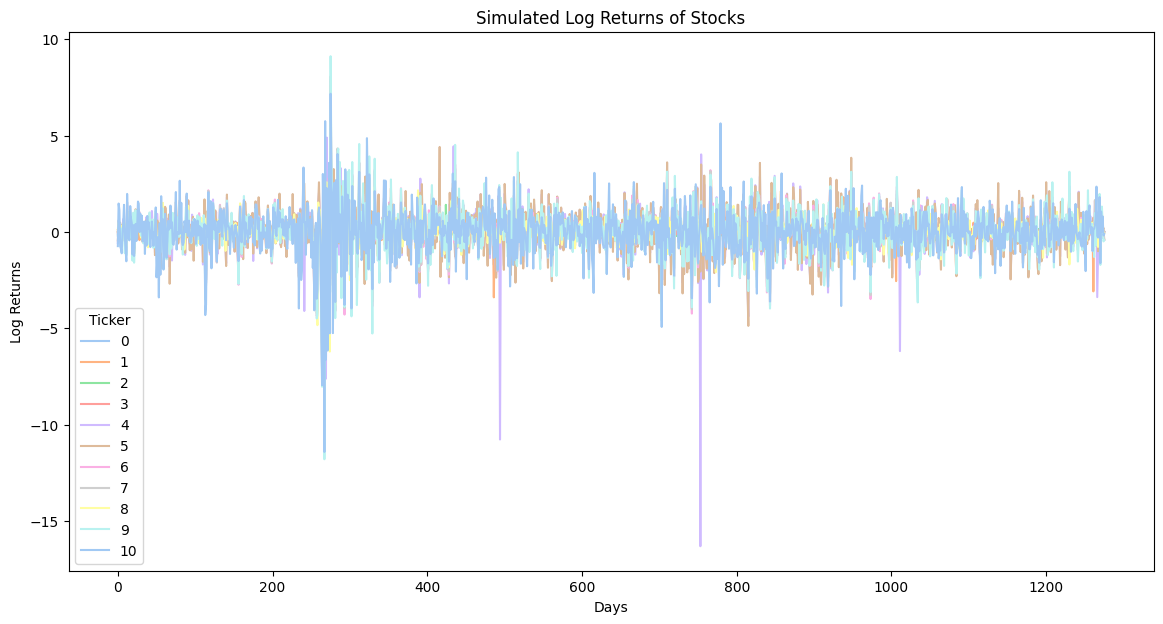

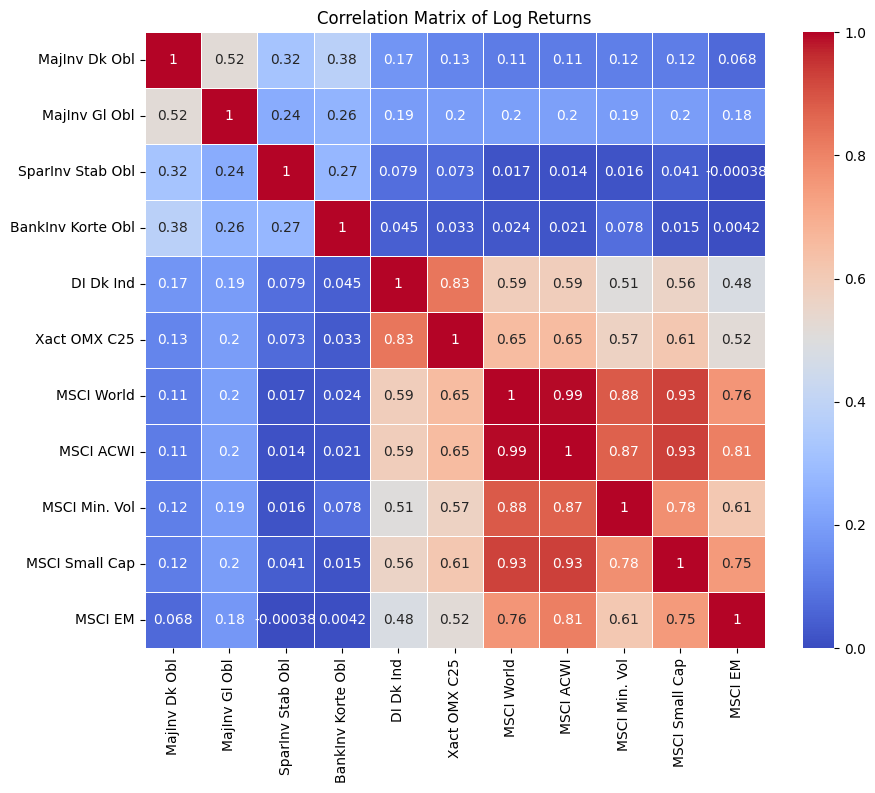

In [19]:

# Plotting the line plot of the simulated stock data
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, palette="pastel", dashes=False)
plt.title('Simulated Log Returns of Stocks')
plt.xlabel('Days')
plt.ylabel('Log Returns')
plt.legend(title='Ticker')
plt.savefig('lineplot.png')  # Saves the line plot
plt.show()

# Plotting the heatmap of the correlations
correlation_matrix = data_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, xticklabels=labels, yticklabels=labels)
plt.title('Correlation Matrix of Log Returns')
plt.savefig('unmodelled_heatmap.png') 
plt.show()

/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

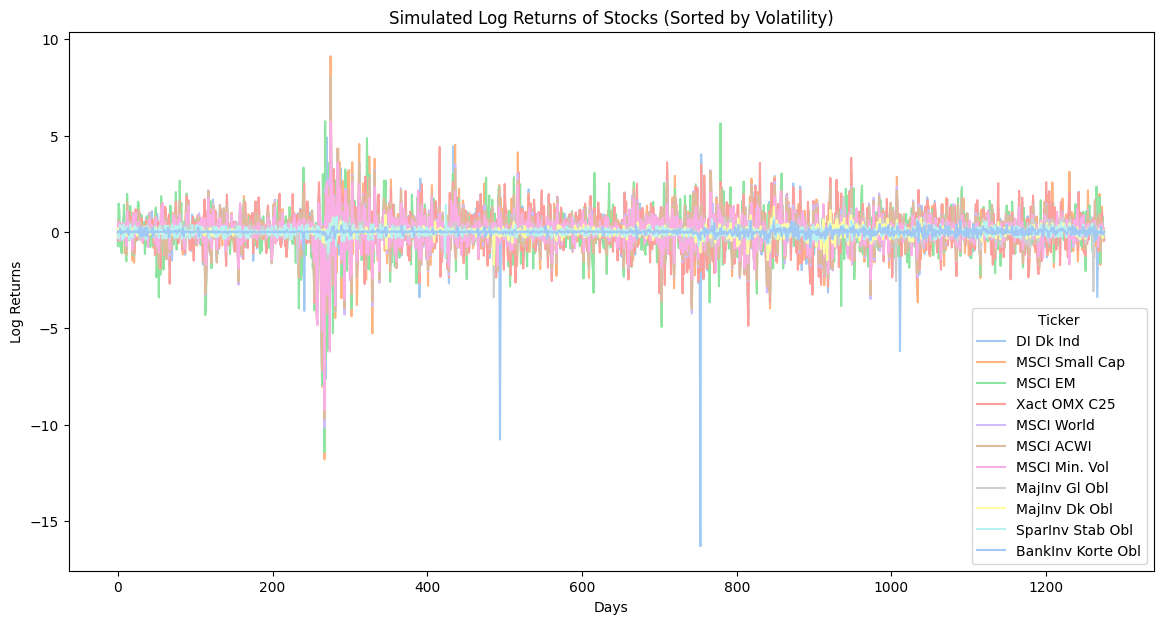

/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

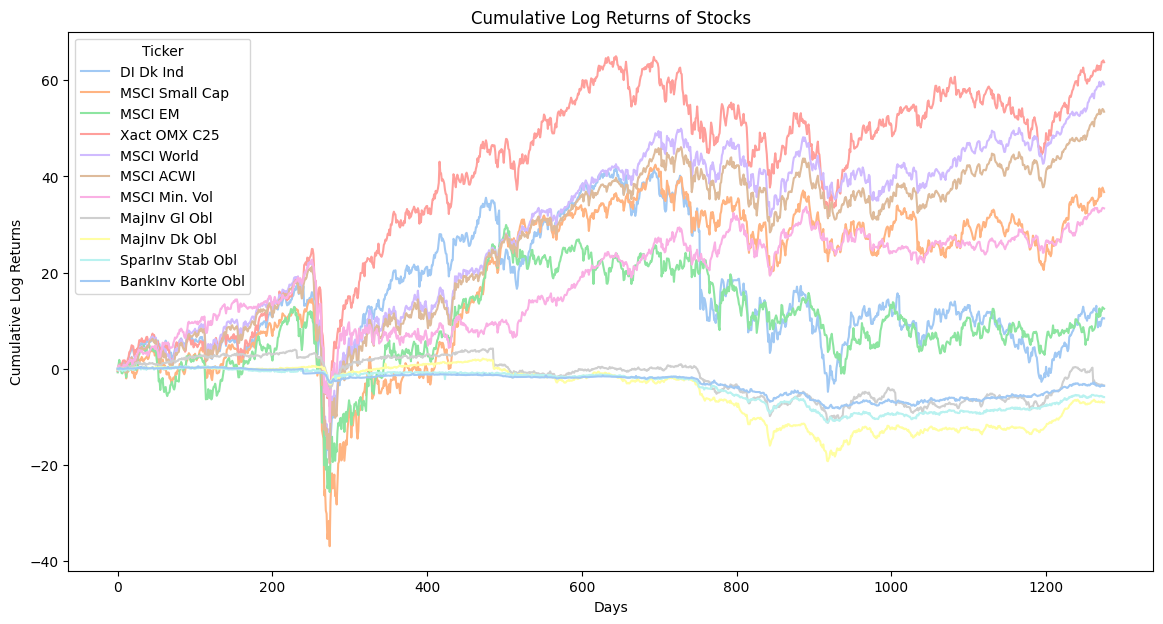

In [20]:
# Step 1: Calculate variance for each column to determine volatility
variances = data_df.var()

# Step 2: Sort the DataFrame based on variance (volatility), descending order
sorted_columns = variances.sort_values(ascending=False).index
data_sorted = data_df[sorted_columns]
# Calculate variance for each column to determine volatility


# Plotting the line plot of the sorted simulated stock data
plt.figure(figsize=(14, 7))

# Create a color palette with a distinct color for each series
palette = sns.color_palette("pastel", len(sorted_columns))

# Plot each series individually to ensure correct color and legend handling
for i, column in enumerate(sorted_columns):
    sns.lineplot(x=data_sorted.index, y=data_sorted[column], color=palette[i], label=column)

plt.title('Simulated Log Returns of Stocks (Sorted by Volatility)')
plt.xlabel('Days')
plt.ylabel('Log Returns')
plt.legend(title='Ticker')
plt.savefig('lineplot_sorted_by_volatility.png')  # Saves the sorted line plot
plt.show()

# Calculate the cumulative sum of the series for each stock
data_cumsum = data_sorted.cumsum()

# Plotting the cumulative sum
plt.figure(figsize=(14, 7))

# Plot each series in the cumulative sum DataFrame individually
for i, column in enumerate(sorted_columns):
    sns.lineplot(x=data_cumsum.index, y=data_cumsum[column], color=palette[i], label=column)

plt.title('Cumulative Log Returns of Stocks')
plt.xlabel('Days')
plt.ylabel('Cumulative Log Returns')
plt.legend(title='Ticker')
plt.savefig('cumulative_log_returns.png')  # Saves the cumulative sum plot
plt.show()

### Estimate the Absolute GARCH
1. Define a Function for the Total Likelihood.
2. Define a Function that Minimizes.
3. Collect Results for all Timeseres.

**The Model**
$$x[t]=\sigma[t] \times z[t]$$
where $z[t] \approx N(0,1)$, &
$$\sigma[t] = \omega + \alpha \times |x[t-1]| + \beta \times |\sigma[t-1]|$$

**The Log-Likelihood Contribution**
$$log L_t = -\frac{1}{2} log 2\pi - log \sigma[t] - \frac{x[t]^2}{2\sigma[t]^2}$$

In [21]:
from scipy.optimize import minimize

# The Likelihood Contribution Function
def log_likelihood_contribution(x, sigma):
    sigma = max(sigma, 1e-8)
    return -0.5 * np.log(2 * np.pi) - np.log(sigma) - (x ** 2) / (2 * sigma ** 2)

# The Total log Likelihood
def total_log_likelihood(parameters, x):
    T = len(x)
    omega, alpha, beta = parameters
    sigma = np.zeros(T)
    # Set initial Sigma to total variance of data
    sigma[0] = np.sqrt(np.var(x))

    # Calculate sigma[t] based on the described model
    for t in range(T):
        sigma[t] = omega + alpha * np.abs(x[t-1]) + beta * np.abs(sigma[t-1])

    # Calculate the log likelihood contributions, and find sum.
    log_likelihood = sum(log_likelihood_contribution(x[t], sigma[t]) for t in range(T))

    # Return Negative Total Log Likelihood
    return - log_likelihood

# Estimate Model
def estimate_garch_parameters(x):
    # Initial Guess of Parameters
    initial_parameters = [0.05, 0.15, 0.85]
    
    # Minimize the Negative Log-Likelihood
    result = minimize(fun=total_log_likelihood, x0=initial_parameters, args=(x,), bounds=[(0, None), (0, 1), (0, 1)])

    if result.success:
        print("Optimization was successful.")
        print(f"Estimated parameters: omega = {result.x[0]}, alpha = {result.x[1]}, beta = {result.x[2]}")
        return result.x
    else:
        print("Optimization failed.")
        return [None, None, None]   



In [22]:
# Initialize a list to store estimation results
estimation_results = []

# Iterate over each time series in 'data' and estimate parameters
for i in range(data.shape[1]):  # data.shape[1] gives the number of time series (columns) in 'data'
    params = estimate_garch_parameters(data[:, i])
    estimation_results.append(params)

# Convert the list of results to a numpy array
estimation_results_array = np.array(estimation_results)

estimation_results_array

Optimization was successful.
Estimated parameters: omega = 0.029912355568381305, alpha = 0.2756619358457441, beta = 0.6715259863419576
Optimization was successful.
Estimated parameters: omega = 0.03457056441678556, alpha = 0.09689341906048282, beta = 0.8230094189525018
Optimization was successful.
Estimated parameters: omega = 0.06545263643626827, alpha = 0.15682623502730256, beta = 0.5576726501365804
Optimization was successful.
Estimated parameters: omega = 0.021157343935020514, alpha = 0.1426219029021941, beta = 0.7504922391555306
Optimization was successful.
Estimated parameters: omega = 0.12446537258214381, alpha = 0.20827482919270915, beta = 0.7484780941054241
Optimization was successful.
Estimated parameters: omega = 0.08378287114160585, alpha = 0.12172558409168666, beta = 0.8326613523879044
Optimization was successful.
Estimated parameters: omega = 0.051587750125506926, alpha = 0.1629844217439024, beta = 0.824139113571658
Optimization was successful.
Estimated parameters: omega

array([[0.02991236, 0.27566194, 0.67152599],
       [0.03457056, 0.09689342, 0.82300942],
       [0.06545264, 0.15682624, 0.55767265],
       [0.02115734, 0.1426219 , 0.75049224],
       [0.12446537, 0.20827483, 0.74847809],
       [0.08378287, 0.12172558, 0.83266135],
       [0.05158775, 0.16298442, 0.82413911],
       [0.0577291 , 0.17435893, 0.80800405],
       [0.05110691, 0.16299271, 0.80641878],
       [0.07031398, 0.14265647, 0.83002984],
       [0.18035356, 0.18066113, 0.70890622]])

### The Constant Conditional Correlation Model
First step is to calculate the standardzed residuals of the model.
They are given by$z[t]=\frac{x[t]}{\sigma[t]}$ And should have mean zero, and a variance of 1.

Then we should Calculate Correlations between the standardized residuals. 
Ensure the following:
- That On-Diagonal elements are ones.
- That Off-Diagonal elements $\in[0,1]$.
- That the Correlation Matrix is Positive Semi-Definite

We can then construct the model as follows:
$$Y_t = \mathbf{\mu} + \mathbf{\varepsilon}_t$$


$$H_t = D_t R D_t$$
Where $D_t$ is a diagonal matrix of conditional standard deviations, $\sigma_{t,i}$, 
$R$ is is the constant correlations matrix, with $\rho_{ij}$ on the diagonal

**The Log-Likelihood Function is given by**
$$L=-\frac{1}{2}\sum_{t=1}^T \left[N log(2 \pi) + 2log(|D_t|) + log(|R|) + z_t\prime R^{-1} z_t \right]$$
with $z_t=D_t^{-1}\varepsilon_t$


thus, we need to generate $D_t$, R, and $z_t$


In [7]:
import numpy as np
from scipy.optimize import minimize
from numpy.linalg import det, inv

def calculate_std(data,univariate):
    T, N = data.shape
    standard_deviations = np.zeros((T,N))
    for i in range(N):
        omega, alpha, beta = univariate[i]
        sigma = np.zeros(T)
        # Set first observation to sample variance
        sigma[0] = np.sqrt(np.var(data[:, i]))
        for t in range(1, T):
            sigma[t] = omega + alpha * np.abs(data[t-1, i]) + beta * np.abs(sigma[t-1])
        standard_deviations[:,i] = sigma
    return standard_deviations

def create_diagonal_matrix(t, my_array):
    """
    Creates an N x N diagonal matrix with standard deviations at time t on the diagonal,
    and zeros elsewhere. Here, N is the number of time series.

    :param t: Integer, the time index for which the diagonal matrix is created.
    :param standard_deviations: List of numpy arrays, each array contains the standard deviations over time for a variable.
    :return: Numpy array, an N x N diagonal matrix with the standard deviations at time t on the diagonal.
    """
    # Extract the standard deviations at time t for each series
    stds_at_t = np.array(my_array[t, :])
    
    # Create a diagonal matrix with these values
    diagonal_matrix = np.diag(stds_at_t)
    
    return diagonal_matrix

def calculate_standardized_residuals(data, univariate):
    T, N = data.shape
    standardized_residuals = np.zeros((T, N))
    for i in range(N):
        omega, alpha, beta = univariate[i]
        sigma = np.zeros(T)
        sigma[0] = np.sqrt(np.var(data[:, i]))  # Initialize with sample variance
        for t in range(1, T):
            sigma[t] = omega + alpha * np.abs(data[t-1, i]) + beta * np.abs(sigma[t-1])
        standardized_residuals[:, i] = data[:, i] / sigma
    return standardized_residuals


# Check if the estimated correlation matrix is positive semi-definite
def is_positive_semi_definite(matrix):
    return np.all(np.linalg.eigvals(matrix) >= -1e-10)  # Allow for numerical precision issues

def form_corr_matrix(params):
    """
    Creates a square matrix with ones on the diagonal and symmetric off-diagonal elements
    based on the input list of parameters.
    
    Parameters:
    - params: A list of numbers to fill into the off-diagonal elements. The length of this list
              should be n(n-1)/2 for a square matrix of size n.
    
    Returns:
    - A numpy array representing the square matrix with the specified properties.
    """
    # Determine the size of the matrix
    n = int(np.sqrt(len(params) * 2)) + 1
    if len(params) != n*(n-1)//2:
        raise ValueError("Invalid number of parameters for any symmetric matrix.")
    
    # Create an identity matrix of size n
    matrix = np.eye(n)
    
    # Fill in the off-diagonal elements
    param_index = 0
    for i in range(n):
        for j in range(i + 1, n):
            matrix[i, j] = matrix[j, i] = params[param_index]
            param_index += 1
            
    return matrix


def CCC_log_likelihood(data, univariate, parameters):
    T, N = data.shape  # Number of observations and time series
    
    # Assuming calculate_standardized_residuals and calculate_std are already defined
    standardized_residuals = calculate_standardized_residuals(data, univariate)
    standard_deviations = calculate_std(data, univariate)
    
    # Form the correlation matrix R using the remaining parameters
    # Assuming the last N*(N-1)/2 parameters are for the correlation matrix
    R = form_corr_matrix(parameters[-int(N*(N-1)/2):])
    
    total_log_likelihood = 0
    
    for t in range(T):
        # Create the D_t matrix for this time t
        D = create_diagonal_matrix(t, standard_deviations)
        inv_D = np.linalg.inv(D)
        det_D = np.linalg.det(D)
        # Calculate H_t, the conditional covariance matrix
        # H_t = D_t @ R @ D_t
        
        # Compute the likelihood contribution for this time t
        # inv_H_t = np.linalg.inv(H_t)  # Inverse of H_t
        # det_H_t = np.linalg.det(H_t)  # Determinant of H_t
        z_t = standardized_residuals[t]  # z_t at time t
        
        # Log likelihood contribution for time t
        log_likelihood_contribution = -0.5 * (N * np.log(2 * np.pi) + np.log(det_D) + z_t.T @ inv_D @ z_t)
        total_log_likelihood += log_likelihood_contribution
    
    return -total_log_likelihood  # Return negative for minimization

def optimize_CCC_model(data):
    T, N = data.shape  # Number of observations and number of time series
    initial_guess = np.random.rand(N * (N - 1) // 2)  # Initial guess for correlations
    print('Guess', initial_guess, params)
    bounds = [(-1, 1) for _ in range(N * (N - 1) // 2)]  # Bounds for correlations
    
    # Define a wrapper function for CCC_log_likelihood to include only parameters as variable
    def objective_function(params):
        return CCC_log_likelihood(data, estimation_results_array, params)
    
    result = minimize(objective_function, initial_guess, bounds=bounds, method='L-BFGS-B')
    
    if result.success:
        optimized_params = result.x
        print("Optimization was successful.")
        return optimized_params
    else:
        print("Optimization failed.")
        return None


### Attempting to constrain.

In [8]:
# def CCC_log_likelihood(data, univariate, parameters):
#     T, N = data.shape  # Number of observations and time series
    
#     # Calculate standardized residuals and standard deviations
#     standardized_residuals = calculate_standardized_residuals(data, univariate)
#     standard_deviations = calculate_std(data, univariate)
    
#     # Form the correlation matrix R using the parameters
#     R = form_corr_matrix(parameters[-int(N*(N-1)/2):])
    
#     # Check if R is PSD and calculate a penalty if not
#     eigenvalues = np.linalg.eigvalsh(R)
#     psd_penalty = np.sum(np.minimum(eigenvalues, 0)**2)
#     psd_penalty_weight = 1e6  # Adjust based on your objective function scale
    
#     total_log_likelihood = 0
#     for t in range(T):
#         D_t = create_diagonal_matrix(t, standard_deviations)
#         H_t = D_t @ R @ D_t
        
#         inv_H_t = np.linalg.inv(H_t)
#         det_H_t = np.linalg.det(H_t)
#         z_t = standardized_residuals[t]
        
#         log_likelihood_contribution = -0.5 * (N * np.log(2 * np.pi) + np.log(det_H_t) + z_t.T @ inv_H_t @ z_t)
#         total_log_likelihood += log_likelihood_contribution
    
#     return -total_log_likelihood + psd_penalty_weight * psd_penalty

# def optimize_CCC_model(data, univariate):
#     T, N = data.shape
#     initial_guess = np.random.rand(N * (N - 1) // 2)  # Guess for the off-diagonal elements of R
#     bounds = [(-1, 1) for _ in range(N * (N - 1) // 2)]
    
#     def objective_function(params):
#         return CCC_log_likelihood(data, univariate, params)
    
#     result = minimize(objective_function, initial_guess, bounds=bounds, method='L-BFGS-B')
    
#     if result.success:
#         optimized_params = result.x
#         print("Optimization was successful.")
#         return optimized_params
#     else:
#         print("Optimization failed.")
#         return None


In [9]:
# Calculate the standardized residuals
standardized_residuals = calculate_standardized_residuals(data, estimation_results_array)
standard_deviations = calculate_std(data, estimation_results_array)
diag = create_diagonal_matrix(1, standard_deviations)
z = np.linalg.inv(diag) * data[1].T
y = np.linalg.inv(diag) * data[1]
z,standardized_residuals[1],diag
# fit = optimize_CCC_model(data, estimation_results_array)
fit = optimize_CCC_model(data)
estimated_matrix = form_corr_matrix(fit)
print(estimated_matrix)

Guess [0.90140869 0.98644298 0.86794519 0.66726544 0.41689472 0.60427586
 0.29475545 0.09809042 0.64939383 0.25569474 0.32252956 0.03319042
 0.28779181 0.91369429 0.80993559 0.18549876 0.92327314 0.60242327
 0.03656139 0.73334354 0.0286639  0.36097227 0.08523052 0.35010198
 0.47469212 0.2993201  0.76477381 0.26099246 0.86120831 0.16515585
 0.88215517 0.72347806 0.40872354 0.31641767 0.62213139 0.88784028
 0.80938975 0.86311435 0.83364948 0.35988209 0.10524548 0.33634824
 0.57374243 0.35112896 0.98272811 0.3025014  0.77831557 0.2824772
 0.89248323 0.54446706 0.20776567 0.66976929 0.64461255 0.32763204
 0.05787344] [0.0018035  0.18064321 0.70891941]
Optimization was successful.
[[1.         0.90140869 0.98644298 0.86794519 0.66726544 0.41689472
  0.60427586 0.29475545 0.09809042 0.64939383 0.25569474]
 [0.90140869 1.         0.32252956 0.03319042 0.28779181 0.91369429
  0.80993559 0.18549876 0.92327314 0.60242327 0.03656139]
 [0.98644298 0.32252956 1.         0.73334354 0.0286639  0.3609

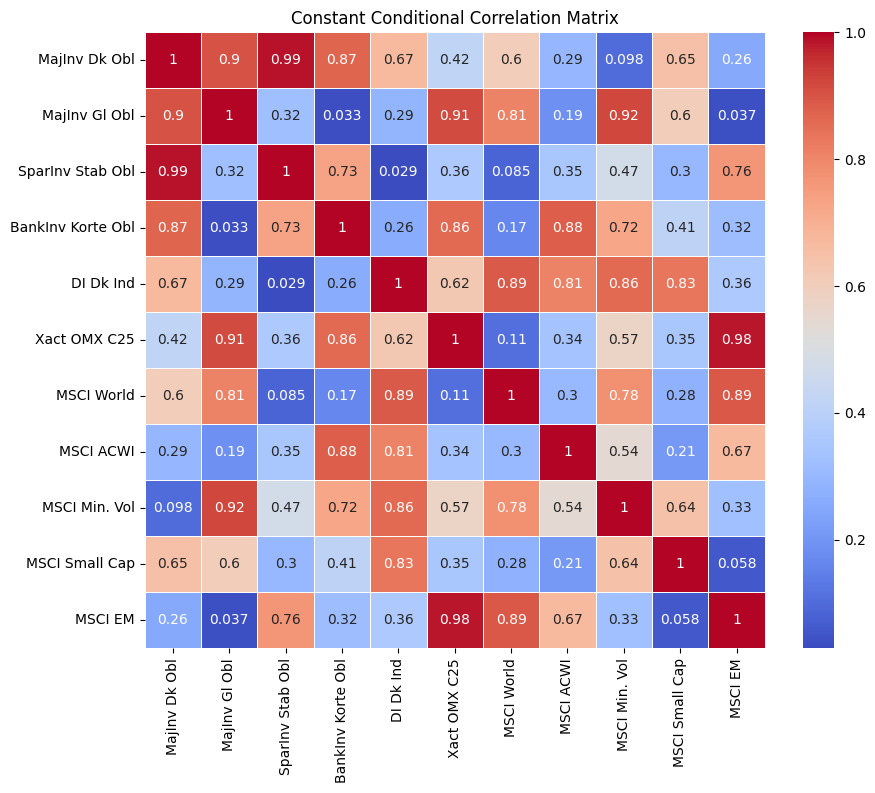

In [10]:
# Plotting the heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(estimated_matrix, annot=True, cmap='coolwarm', linewidths=.5, xticklabels=labels, yticklabels=labels)
plt.title('Constant Conditional Correlation Matrix')
plt.savefig('CCC_Heatmap.png')
plt.show()

In [11]:
def is_valid_correlation_matrix(matrix):
    # Check diagonal elements are all 1
    if not np.all(np.diag(matrix) == 1):
        return False, "Not all diagonal elements are 1."
    
    # Check off-diagonal elements are between -1 and 1
    if not np.all((matrix >= -1) & (matrix <= 1)):
        return False, "Not all off-diagonal elements are between -1 and 1."
    
    # Check if the matrix is positive semi-definite
    # A matrix is positive semi-definite if all its eigenvalues are non-negative.
    eigenvalues = np.linalg.eigvals(matrix)
    if np.any(eigenvalues < -0.5):
        print(eigenvalues)
        return False, "The matrix is not positive semi-definite."
    
    return True, "The matrix meets all criteria."


valid, message = is_valid_correlation_matrix(estimated_matrix)
print(message)

[ 6.14062395 -1.16339859 -0.79934773  1.90977172  1.56226347  1.25377626
  0.9991466   0.60832285  0.43863021 -0.07767652  0.12788776]
The matrix is not positive semi-definite.


In [12]:
valid, message = is_valid_correlation_matrix(correlation_matrix)
print(message)

The matrix meets all criteria.


In [13]:
rounded_matrix = np.round(estimated_matrix, 2)
valid, message = is_valid_correlation_matrix(estimated_matrix)
print(message)

[ 6.14062395 -1.16339859 -0.79934773  1.90977172  1.56226347  1.25377626
  0.9991466   0.60832285  0.43863021 -0.07767652  0.12788776]
The matrix is not positive semi-definite.


In [14]:
# from scipy.optimize import minimize

# def log_likelihood(params, data, S_t, T, K):
#     Gamma = reconstruct_Gamma(params, K)
#     log_likelihood = 0
    
#     for t in range(T):
#         Y_t = data[:, t].reshape(-1, 1)  # Ensure it's a column vector
#         St_inv = np.linalg.inv(S_t[t])  # Inverse of S_t for this t
#         Gamma_inv = np.linalg.inv(Gamma)  # Inverse of Gamma
        
#         # Calculate S_tGammaS_t and its determinant and inverse
#         S_tGammaS_t = S_t[t] @ Gamma @ S_t[t]
#         det_S_tGammaS_t = np.linalg.det(S_tGammaS_t)
#         log_det_S_tGammaS_t = np.log(det_S_tGammaS_t)
        
#         # Compute the term involving Y_t
#         term = Y_t.T @ St_inv @ Gamma_inv @ St_inv @ Y_t
        
#         log_likelihood += -0.5 * (K * np.log(2 * np.pi) + log_det_S_tGammaS_t + term[0, 0])
    
#     return -log_likelihood  # Negative log likelihood for minimization


    
# def reconstruct_Gamma(params, K):
#     """
#     Reconstruct the correlation matrix Gamma from the given parameters,
#     ensuring it is positive semi-definite.
    
#     Args:
#     - params: A vector of parameters from which to construct the off-diagonal elements of Gamma.
#     - K: The dimension of the Gamma matrix (number of time series).
    
#     Returns:
#     - Gamma: The reconstructed, positive semi-definite correlation matrix.
#     """
#     # Initialize Gamma as an identity matrix
#     Gamma = np.eye(K)
    
#     # Fill in the off-diagonal elements from params
#     idx = np.triu_indices(K, k=1)
#     Gamma[idx] = params
#     Gamma[(idx[1], idx[0])] = params  # Symmetric
    
#     # Ensure Gamma is positive semi-definite
#     eigvals, eigvecs = np.linalg.eigh(Gamma)
#     eigvals[eigvals < 0] = 0.0001  # Replace negative eigenvalues with a small positive number
#     Gamma_psd = eigvecs @ np.diag(eigvals) @ eigvecs.T
    
#     # Ensure diagonal elements are 1 (may be altered during the process to correct positive semi-definiteness)
#     np.fill_diagonal(Gamma_psd, 1)
    
#     return Gamma_psd


# def estimate_Gamma(U_tilde, S_t, T, K):
#     initial_params = np.random.rand(K * (K - 1) // 2)  # Initial guess
#     result = minimize(fun=log_likelihood, x0=initial_params, args=(U_tilde, S_t, T, K))
    
#     if result.success:
#         optimized_params = result.x
#         # Reconstruct Gamma from the optimized parameters
#         Gamma_optimized = reconstruct_Gamma(optimized_params, K)
#         return Gamma_optimized
#     else:
#         print("Optimization failed.")
#         return None
# def construct_St_matrices(volatilities):
#     T, K = volatilities.shape
#     S_t = [np.diag(volatilities[t, :]) for t in range(T)]
#     return S_t



In [15]:

# # Example usage (placeholders for U_tilde, S_t, T, K)
# # U_tilde = np.random.rand(K, T)  # Standardized residuals, placeholder
# # S_t = [np.diag(np.random.rand(K)) for _ in range(T)]  # Diagonal matrices of std devs, placeholder
# # T = 100  # Number of time points, placeholder
# # K = 5    # Number of time series
# # Gamma_estimated = estimate_Gamma(U_tilde, S_t, T, K)
# # Assuming volatilities are extracted or computed similarly to standardized residuals
# S_t = construct_St_matrices(volatilities)

# # Calculate the standardized residuals
# standardized_residuals = calculate_standardized_residuals(data, estimation_results_array)

# # Estimate correlations from the standardized residuals
# estimated_correlations = np.corrcoef(standardized_residuals, rowvar=False)

# # Checking the properties of the correlation matrix
# is_psd = is_positive_semi_definite(estimated_correlations)
# diagonal_ones = np.allclose(np.diag(estimated_correlations), 1)
# values_in_range = np.all(estimated_correlations >= -1) and np.all(estimated_correlations <= 1)

# estimated_correlations, is_psd, diagonal_ones, values_in_range

In [16]:
# # Assuming 'data' is your returns matrix and 'estimation_results_array' contains GARCH parameters
# T, K = data.shape  # Number of time points and series

# # Calculate S_t: A list of diagonal matrices of standard deviations for each time point
# S_t = [np.diag(standardized_residuals[t, :]) for t in range(T)]

# # Now, estimate Gamma using the standardized residuals (U_tilde) and S_t
# Gamma_estimated = estimate_Gamma(standardized_residuals, S_t, T, K)

# # Print or return the estimated Gamma matrix
# print("Estimated Gamma:", Gamma_estimated)
